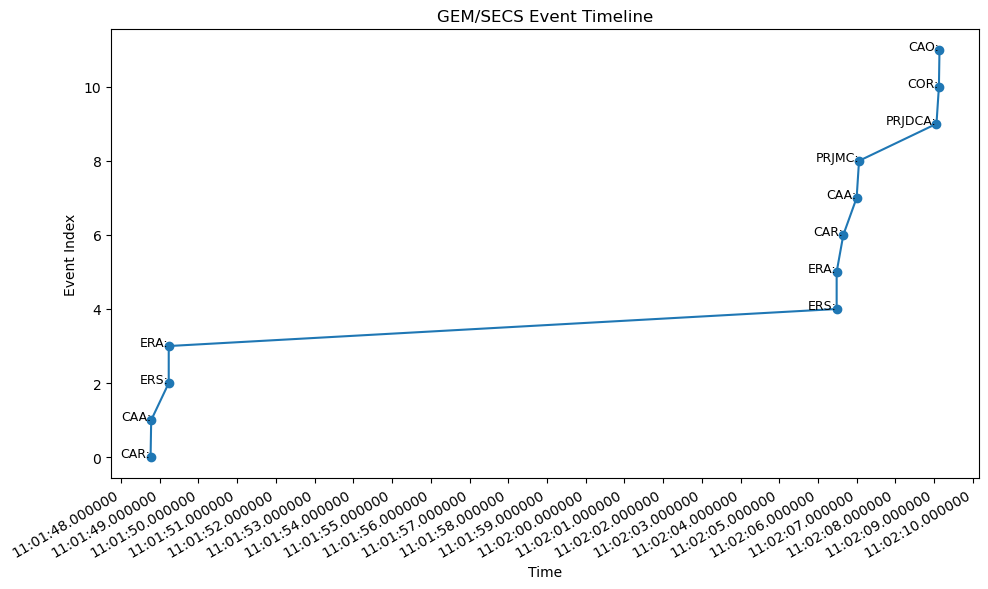

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 解析日誌文件
log_data = """
/* 2020-08-25 11:01:48.763 Sent */ CAR: 'S3F17'
/* 2020-08-25 11:01:48.779 Rcvd */ CAA: 'S3F18'
/* 2020-08-25 11:01:49.232 Rcvd */ ERS: 'S6F11'
/* 2020-08-25 11:01:49.232 Sent */ ERA: 'S6F12'
/* 2020-08-25 11:02:06.482 Rcvd */ ERS: 'S6F11'
/* 2020-08-25 11:02:06.482 Sent */ ERA: 'S6F12'
/* 2020-08-25 11:02:06.654 Sent */ CAR: 'S3F17'
/* 2020-08-25 11:02:06.998 Rcvd */ CAA: 'S3F18'
/* 2020-08-25 11:02:07.060 Sent */ PRJMC: 'S16F15'
/* 2020-08-25 11:02:09.060 Rcvd */ PRJDCA: 'S16F16'
/* 2020-08-25 11:02:09.123 Sent */ COR: 'S14F9'
/* 2020-08-25 11:02:09.138 Rcvd */ CAO: 'S14F10'
"""

# 提取時間戳和事件
events = []
for line in log_data.split('\n'):
    if line.strip():
        parts = line.split('*/')
        timestamp_str = parts[0].replace('/*', '').strip()
        event = parts[1].strip().split()[0]
        timestamp_str = ' '.join(timestamp_str.split()[:2])  # Remove extra text
        timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S.%f')
        events.append((timestamp, event))

# 分離時間戳和事件名稱
timestamps = [event[0] for event in events]
event_names = [event[1] for event in events]

# 繪製時間序列圖
plt.figure(figsize=(10, 6))
plt.plot(timestamps, range(len(timestamps)), marker='o', linestyle='-')

# 設置圖表標題和標籤
plt.title('GEM/SECS Event Timeline')
plt.xlabel('Time')
plt.ylabel('Event Index')

# 格式化時間軸
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=1))
plt.gcf().autofmt_xdate()

# 添加事件名稱標籤
for i, (timestamp, event) in enumerate(events):
    plt.text(timestamp, i, event, fontsize=9, ha='right')

plt.tight_layout()
plt.show()